In [2]:
file='20200917_guppi_59046_53079_001660_J0825-5010_0001-ics.rawspec.0000.combined.fil'

In [7]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils

In [3]:
test=Waterfall(file)

In [4]:
test.grab_data()

(array([ 856.        ,  856.20898438,  856.41796875, ..., 1497.37304688,
        1497.58203125, 1497.79101562]),
 array([[292522.12 ,  13124.256,  13145.54 , ...,  39680.414,  41392.902,
          43924.14 ],
        [ 41721.24 ,  39116.93 ,  39151.902, ...,  63911.57 ,  64003.26 ,
          63868.91 ],
        [ 63910.875,  63901.47 ,  63844.91 , ...,  75657.375,  75547.83 ,
          75732.04 ],
        ...,
        [ 59638.023,  56741.707,  56498.37 , ...,  64096.746,  63998.613,
          63988.715],
        [ 63891.65 ,  63949.766,  63986.72 , ...,  75675.09 ,  75565.81 ,
          75714.02 ],
        [ 73225.336,  73109.75 ,  73075.82 , ...,  87672.03 ,  87808.36 ,
          87669.56 ]], dtype=float32))

In [27]:
import peakutils

In [305]:
w.container.n_channels_in_file

3072

extracting integration 0...
extracting integration 0...


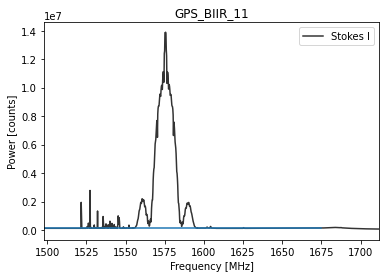

In [137]:
gps="data/20200917_guppi_59143_55142_000486_GPS-BIIR-11_0001-ics.rawspec.combined.fil"
w=Waterfall(gps)
w.plot_spectrum()
f=w.get_freqs()
power=w.get_power()[1]
base=peakutils.baseline(power[:847],deg=1,tol=1e-2)
plt.plot(f[:847],base)
plt.plot(x,chan,'--')

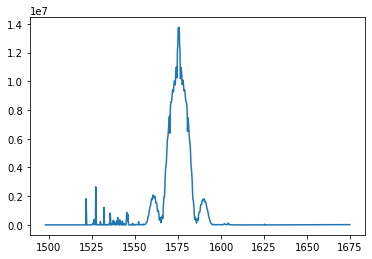

In [143]:
tol=power[:847]-base
plt.plot(f[:847],tol)

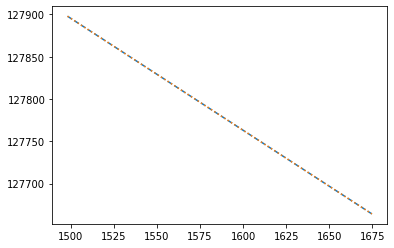

In [142]:
m,b=np.polyfit(f[:847],base,deg=1)
plt.plot(f[:847],base,'--',f[:847],m*f[:847]+b,":")

In [148]:
knots=np.linspace(w.container.f_start,w.container.f_stop,10)
knots

array([ 856.        ,  927.33333333,  998.66666667, 1070.        ,
       1141.33333333, 1212.66666667, 1284.        , 1355.33333333,
       1426.66666667, 1498.        ])

In [299]:
w.container.n_channels_in_file

3072

extracting integration 0...
extracting integration 0...


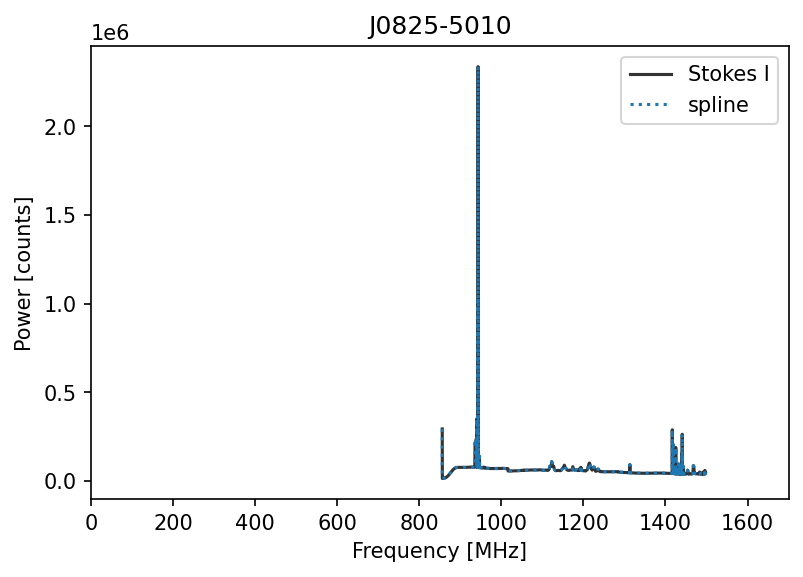

In [4]:
plt.figure(dpi=150)
w=Waterfall("data/20200917_guppi_59046_53079_001660_J0825-5010_0001-ics.rawspec.0000.combined.fil")
x=w.get_freqs()
knots=np.linspace(w.container.f_start,w.container.f_stop,10)
spl=interpolate.splrep(x,w.get_power()[1])
chan=interpolate.splev(x,spl)
w.plot_spectrum()
plt.plot(x,chan,":",label="spline")
plt.xlim(0,1700)
plt.legend()

In [205]:
w.header

{'machine_id': 20,
 'telescope_id': -1,
 'data_type': 1,
 'fch1': 856.0,
 'foff': 0.208984375,
 'nchans': 3072,
 'source_name': 'J0825-5010',
 'src_raj': <Angle 8.43386389 hourangle>,
 'src_dej': <Angle -47.24847222 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'nbits': 32,
 'tstart': 59046.61435185185,
 'tsamp': 0.31359282242990655,
 'nifs': 1}

In [204]:
856+0.208984375*3072

1498.0

In [80]:
tol=chan-w.get_power()[1]
chan.shape

extracting integration 0...


(3072,)

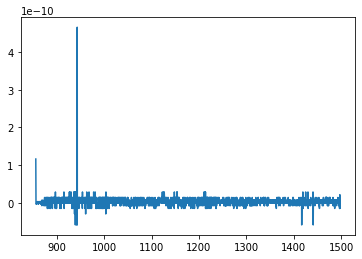

In [65]:
plt.plot(x,tol)

extracting integration 0...
(23,)
extracting integration 0...


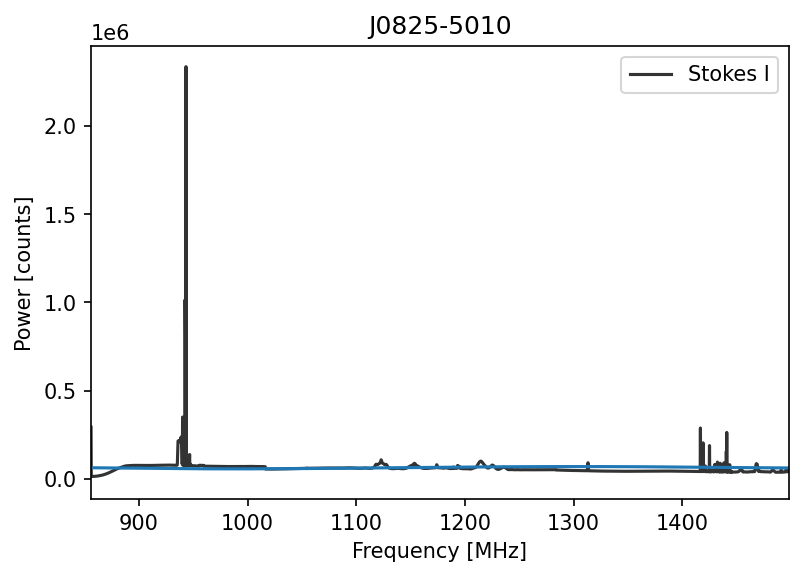

In [5]:
plt.figure(dpi=150)
channel_width=3072
spl_order=16
integrated_channel=w.get_power()[1]
x = np.arange(channel_width)
knots = np.arange(0, channel_width, channel_width//spl_order+1)
spl = interpolate.splrep(x, integrated_channel, t=knots[1:],task=0,s=0)
chan_fit = interpolate.splev(x, spl)
print(spl[0].shape)
w.plot_spectrum()
plt.plot(x,chan_fit)

In [31]:
x=w.get_freqs()
np.where(x>1000)

(array([ 690,  691,  692, ..., 3069, 3070, 3071]),)

In [407]:
knots

array([  0, 240])

extracting integration 0...


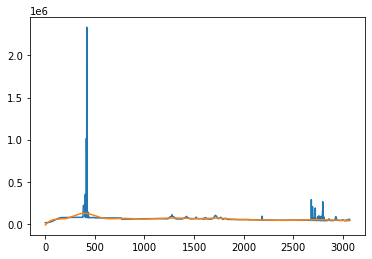

In [27]:
x=np.arange(0,3072,1)[500:1000]
y=w.get_power()[1][500:1000]
plt.plot(x,y)
knots = np.arange(0, 3072, 3072//16+1)
spl = interpolate.splrep(x, y, t=knots[1:])
chan_fit = interpolate.splev(x, spl)
plt.plot(x,chan_fit)

extracting integration 0...
(23,)
extracting integration 0...


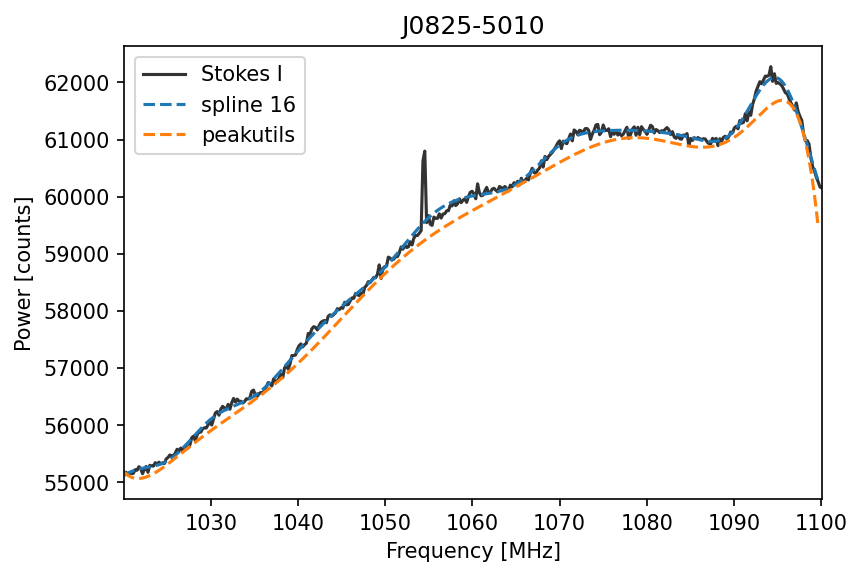

In [34]:
plt.figure(dpi=150)
channel_width=1167-785
spl_order=16
x=w.get_freqs()[785:1167]
integrated_channel=w.get_power()[1][785:1167]
knots = np.arange(0, channel_width, channel_width//spl_order+1)
spl = interpolate.splrep(x, integrated_channel,t=x[0]+knots[1:]*w.header['foff'])
chan_fit = interpolate.splev(x, spl)
print(spl[0].shape)
w.plot_spectrum(f_start=1020,f_stop=1100)
plt.plot(x,chan_fit,'--',label='spline '+str(spl_order))
base=peakutils.baseline(integrated_channel,deg=10)
plt.plot(x,base,'--',label='peakutils')
plt.legend()

extracting integration 0...


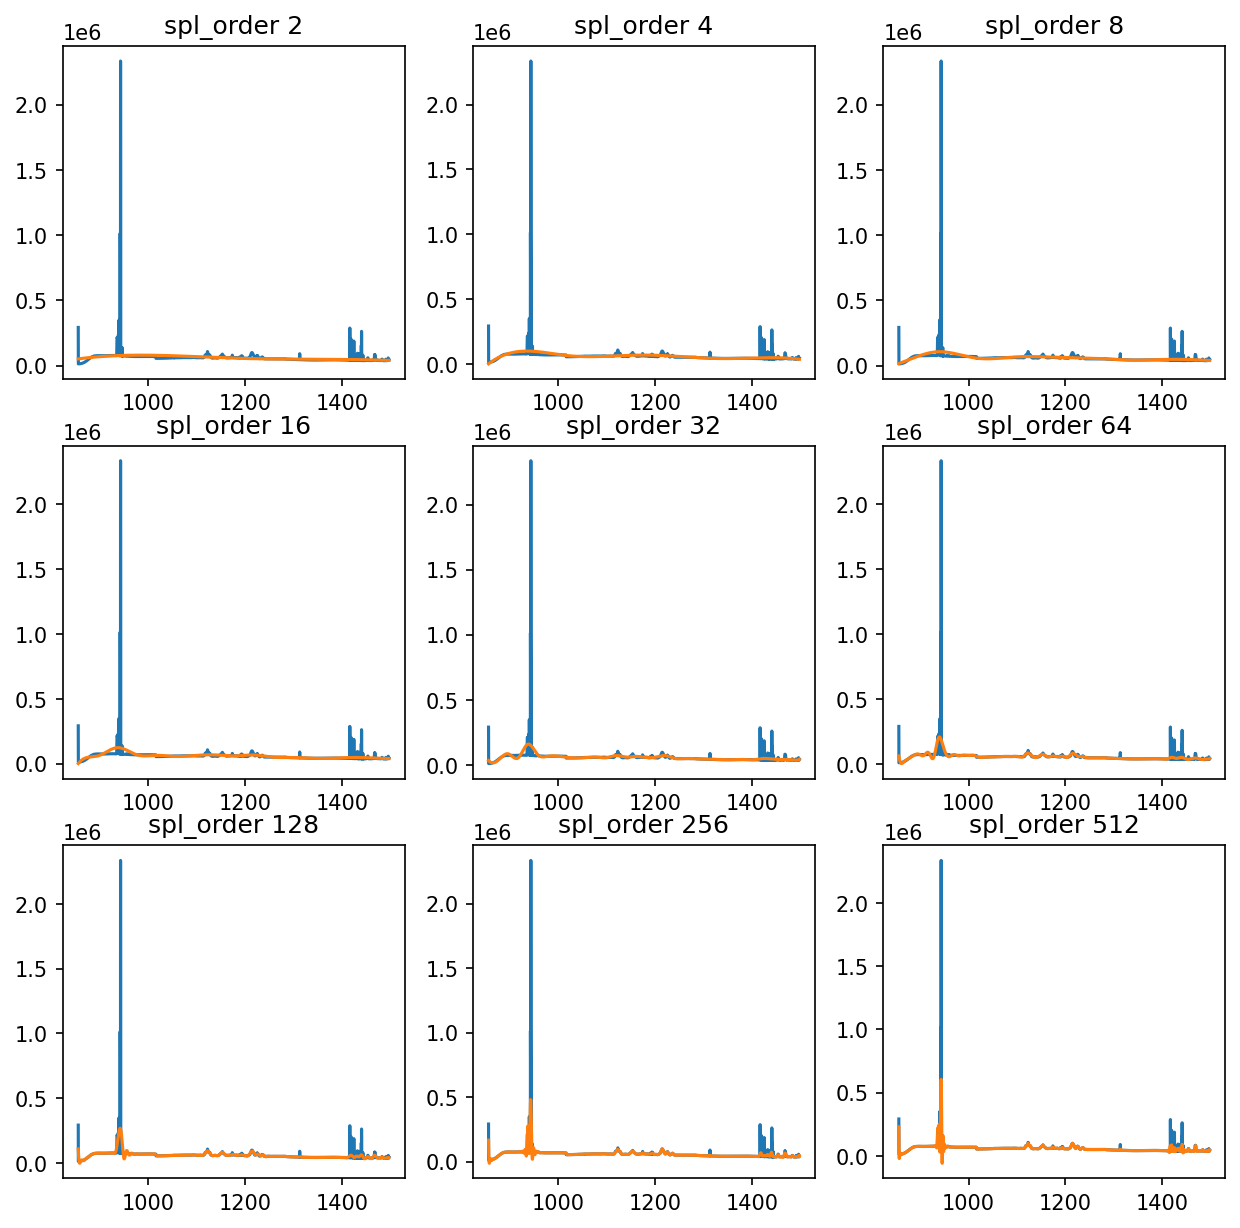

In [297]:
channel_width=3072
x=w.get_freqs()
integrated_channel=w.get_power()[1]
fig,ax=plt.subplots(3,3,dpi=150,figsize=(10,10))
chan=np.ones((3,3))
for i in range(0,9):
    spl_order=2**(i+1)
    knots = np.arange(0, channel_width, channel_width//spl_order+1)
    spl = interpolate.splrep(x, integrated_channel,t=856.0+knots[1:]*w.header['foff'])
    chan_fit = interpolate.splev(x, spl)
    if i==0 or i==1 or i==2:
        ax[0,i].plot(x,integrated_channel)
        ax[0,i].plot(x,chan_fit)
        ax[0,i].set_title("spl_order "+str(2**(i+1)))
    elif i==3 or i==4 or i==5:
        ax[1,i-3].plot(x,integrated_channel)
        ax[1,i-3].plot(x,chan_fit)
        ax[1,i-3].set_title("spl_order "+str(2**(i+1)))
    elif i==6 or i==7 or i==8:
        ax[2,i-6].plot(x,integrated_channel)
        ax[2,i-6].plot(x,chan_fit)
        ax[2,i-6].set_title("spl_order "+str(2**(i+1)))
plt.savefig('spl_order.pdf')
plt.show()

extracting integration 0...
extracting integration 0...


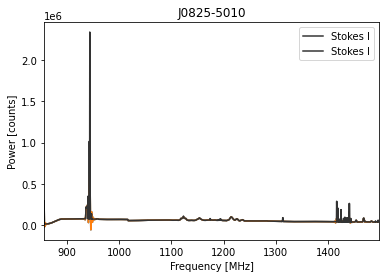

In [278]:
ax[1,1]=plt.plot(x,chan_fit)
ax[1,1]=w.plot_spectrum()
ax[2,1]=plt.plot(x,chan_fit)
ax[2,1]=w.plot_spectrum()

In [302]:
import rfi
import peakutils

extracting integration 0...
extracting integration 0...


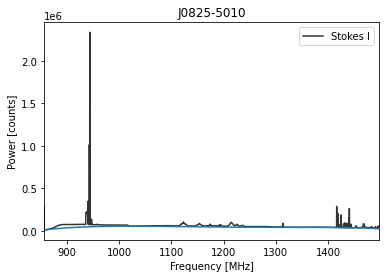

In [304]:
w.plot_spectrum()
power=w.get_power()[1]
base=peakutils.baseline(power,deg=4)
plt.plot(w.get_freqs(),base)

In [370]:
n=Waterfall("data/20200917_guppi_59087_55680_001685_J1101-6424_0001-ics.rawspec.0000.combined.fil")

plt.figure(dpi=150)
channel_width=n.container.n_channels_in_file
spl_order=8
x=n.get_freqs()
integrated_channel=n.get_power()[1]
knots = np.linspace(0, channel_width, channel_width//spl_order+1)
spl = interpolate.splrep(x, integrated_channel,t=900.0+knots[1:]*n.header['foff'])
chan_fit = interpolate.splev(x, spl)
print(spl[0].shape)
n.plot_spectrum()
plt.plot(x,chan_fit)

extracting integration 0...


ValueError: Error on input data

<Figure size 900x600 with 0 Axes>

extracting integration 0...


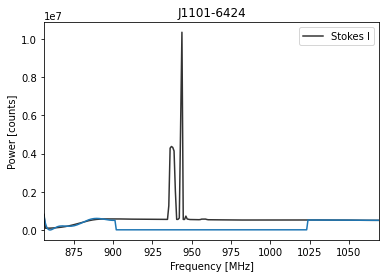

In [368]:
import scipy
y=scipy.signal.savgol_filter(integrated_channel,111,10)
n.plot_spectrum()
plt.plot(n.get_freqs(),y)